In [94]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
%matplotlib inline


In [95]:
train_identity = pd.read_csv('/Users/shamod/CODE/COURSES/SRMachineLearning/hw3_fraud_detection/ieee-fraud-detection/train_identity.csv')

In [96]:
train_transaction = pd.read_csv('/Users/shamod/CODE/COURSES/SRMachineLearning/hw3_fraud_detection/ieee-fraud-detection/train_transaction.csv')

In [97]:
test_identity = pd.read_csv('/Users/shamod/CODE/COURSES/SRMachineLearning/hw3_fraud_detection/ieee-fraud-detection/test_identity.csv')

In [98]:
test_transaction = pd.read_csv('/Users/shamod/CODE/COURSES/SRMachineLearning/hw3_fraud_detection/ieee-fraud-detection/test_transaction.csv')

In [99]:
def reduce_mem_usage(df):
    numv = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2 
    for col in df.columns:
        vt = df[col].dtypes
        if vt in numv:
            max_c = df[col].max()
            min_c = df[col].min()
            if str(vt)[:3] == 'int':
                if min_c > np.iinfo(np.int8).min and max_c < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif min_c > np.iinfo(np.int16).min and max_c < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif min_c > np.iinfo(np.int32).min and max_c < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif min_c > np.iinfo(np.int64).min and max_c < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if min_c > np.finfo(np.float16).min and max_c < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif min_c > np.finfo(np.float32).min and max_c < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                elif min_c > np.finfo(np.float64).min and max_c < np.finfo(np.float64).max:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [100]:
train_identity_rm = reduce_mem_usage(train_identity)
train_transaction_rm = reduce_mem_usage(train_transaction)
test_identity_rm = reduce_mem_usage(test_identity)
test_transaction_rm = reduce_mem_usage(test_transaction)

Mem. usage decreased to 25.86 Mb (42.7% reduction)
Mem. usage decreased to 542.35 Mb (69.4% reduction)
Mem. usage decreased to 25.44 Mb (42.7% reduction)
Mem. usage decreased to 472.59 Mb (68.9% reduction)


In [101]:
train_df = pd.merge(train_transaction_rm, train_identity_rm, on='TransactionID', how='left')
test_df = pd.merge(test_transaction_rm, test_identity_rm, on='TransactionID', how='left')

In [102]:
del train_identity_rm, train_transaction_rm, test_identity_rm, test_transaction_rm

In [103]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TransactionID,590540.0,3.282270e+06,1.704744e+05,2.987000e+06,3.134635e+06,3282269.50,3429904.25,3577539.0
isFraud,590540.0,3.499001e-02,1.837546e-01,0.000000e+00,0.000000e+00,0.00,0.00,1.0
TransactionDT,590540.0,7.372311e+06,4.617224e+06,8.640000e+04,3.027058e+06,7306527.50,11246620.00,15811131.0
TransactionAmt,590540.0,NaN,NaN,2.509766e-01,4.331250e+01,68.75,125.00,31936.0
card1,590540.0,9.898735e+03,4.901170e+03,1.000000e+03,6.019000e+03,9678.00,14184.00,18396.0
card2,581607.0,NaN,NaN,1.000000e+02,2.140000e+02,361.00,512.00,600.0
card3,588975.0,NaN,0.000000e+00,1.000000e+02,1.500000e+02,150.00,150.00,231.0
card5,586281.0,NaN,0.000000e+00,1.000000e+02,1.660000e+02,226.00,226.00,237.0
addr1,524834.0,NaN,NaN,1.000000e+02,2.040000e+02,299.00,330.00,540.0
addr2,524834.0,NaN,0.000000e+00,1.000000e+01,8.700000e+01,87.00,87.00,102.0


In [104]:
cat_cols = [col for col in train_df.columns if train_df[col].dtype in ['object']]
train_df[cat_cols].describe().transpose()

,count,unique,top,freq
ProductCD,590540,5,W,439670
card4,588963,4,visa,384767
card6,588969,4,debit,439938
P_emaildomain,496084,59,gmail.com,228355
R_emaildomain,137291,60,gmail.com,57147
M1,319440,2,T,319415
M2,319440,2,T,285468
M3,319440,2,T,251731
M4,309096,3,M0,196405
M5,240058,2,F,132491


0    96.500999
1     3.499001
Name: isFraud, dtype: float64

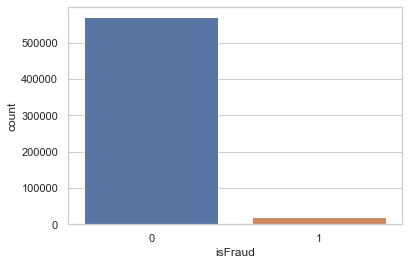

In [105]:
sns.countplot(train_df['isFraud'])
train_df['isFraud'].value_counts(normalize=True) * 100

In [106]:
def missing_data(df):
    count = df.isnull().sum()
    percent = (df.isnull().sum() / df.isnull().count()) * 100
    total = pd.concat([count, percent], axis=1, keys = ['Count', 'Percent'])
    types = []
    return np.transpose(total)
missing_data(train_df)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
Count,0.0,0.0,0.0,0.0,0.0,0.0,8933.000000,1565.000000,1577.000000,4259.000000,...,450258.000000,512954.000000,517251.000000,512735.000000,449555.000000,449555.000000,449555.000000,449555.000000,449730.000000,471874.00000
Percent,0.0,0.0,0.0,0.0,0.0,0.0,1.512683,0.265012,0.267044,0.721204,...,76.245132,86.861855,87.589494,86.824771,76.126088,76.126088,76.126088,76.126088,76.155722,79.90551


In [107]:
null_percent = train_df.isnull().sum() / train_df.shape[0] * 100


In [108]:
cols_to_drop = np.array(null_percent[null_percent > 50].index)
train_df = train_df.drop(cols_to_drop, axis=1)
test_df = test_df.drop(cols_to_drop, axis=1)
train_df.shape
test_df.shape

(506691, 219)

In [109]:
train_df = train_df.fillna(-999)
test_df = test_df.fillna(-999)
train_y = train_df['isFraud']
train_X = train_df.drop('isFraud', axis=1)
print(train_y)
print(train_X)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
590510    0
590511    0
590512    0
590513    0
590514    0
590515    0
590516    0
590517    0
590518    0
590519    0
590520    0
590521    0
590522    0
590523    0
590524    0
590525    0
590526    1
590527    0
590528    0
590529    0
590530    0
590531    0
590532    0
590533    0
590534    0
590535    0
590536    0
590537    0
590538    0
590539    0
Name: isFraud, Length: 590540, dtype: int8
        TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0             2987000          86400       68.500000         W  13926 -999.0   
1             2987001          86401       29.000000         W   

In [110]:
for f in train_X.columns:
    if train_X[f].dtype=='object' or test_df[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_X[f].values) + list(test_df[f].values))
        train_X[f] = lbl.transform(list(train_X[f].values))
        test_df[f] = lbl.transform(list(test_df[f].values))


In [111]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

/Users/shamod/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
submission = pd.read_csv('/Users/shamod/CODE/COURSES/SRMachineLearning/hw3_fraud_detection/ieee-fraud-detection/sample_submission.csv',index_col='TransactionID')
submission['isFraud'] = logreg.predict_proba(test_df)[:,1]
submission.to_csv('Logreg_submission.csv')
submission.head()

,isFraud
TransactionID,
3663549,0.019640
3663550,0.023160
3663551,0.031583
3663552,0.029322
3663553,0.026619
